# Visualization Examples

With this notebook, we'll walk through some examples that demonstrate how to use text-ken's visualization functions. The text we'll use is TikTok's Privacy Policy for users in the US in August 2020.

In [1]:
from context import extract as ext
from context import visualize as vis
import matplotlib.pyplot as plt
from regex import sub

%matplotlib inline

For our purposes, we'll create tokens from the privacy policy simply by using whitespace as a separator. We'll lowercase those tokens, remove short tokens (those shorter than 5 characters), and remove a few punctuation marks.

In [10]:
tiktok = ext.get_docx_file('../tests/data/tiktok_us_privacy_policy.docx')
tiktok_tokens = [sub('[!,\.\?]+', '', a.strip().lower()) for a in tiktok.split() if len(a) > 4]
print('We have {:,} tokens to use.'.format(len(tiktok_tokens)))

We have 1,490 tokens to use.


### Wordclouds

Creating wordclouds with text-ken is simple and is an easy way to see what words/tokens are most prevalent in the text. Two wordcloud examples are below: one with a default black background and another with a white background.

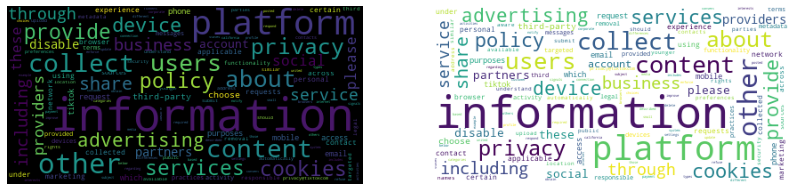

In [11]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)
ax.imshow(vis.get_wordcloud(tiktok_tokens))
ax.axis('off')

bx = fig.add_subplot(122)
bx.imshow(vis.get_wordcloud(tiktok_tokens, background_color='white'))
bx.axis('off')

plt.show()

### Word bars

Sometimes, it's easier to see the differences between the sizes of the words in the wordclouds by displaying the sizes using bars instead. Word bars in text-ken allow you to do just that.

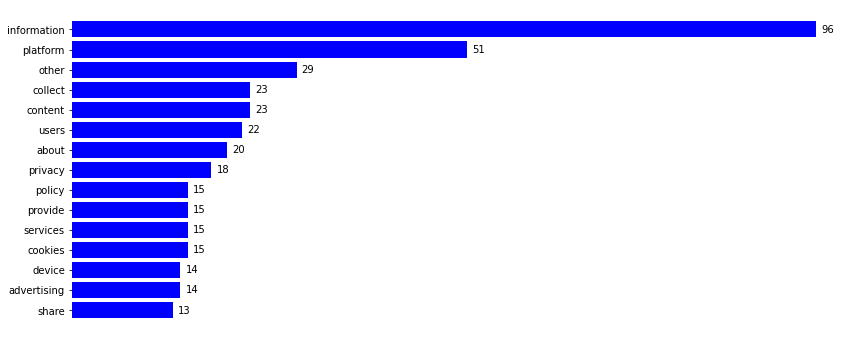

In [12]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(111)
vis.get_word_bars(ax, tiktok_tokens)
plt.show()

Using the wordclouds, it was easy to see that "information" occurred more times than "platform", but I wouldn't have guessed that it appeared almost twice as many times. The word bars make it much easier to see that.

### Dispersion plots

In addition to simply knowing what words frequently appear in the document, it's also useful to see where they appear in the document. We can use dispersion plots to do just that. Here are two dispersion plots. They show the same information, yet are colored differently to show how that can be accomplished using text-ken.

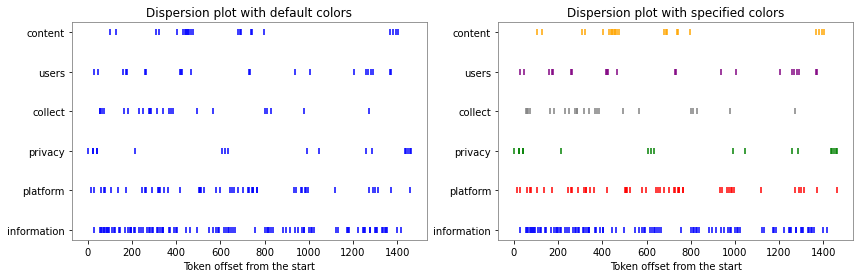

In [16]:
tokens_of_interest = ['information', 'platform', 'privacy', 'collect', 'users', 'content']
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(121)
vis.get_dispersion_plot(ax, tokens_of_interest, tiktok_tokens)
ax.set_title('Dispersion plot with default colors')

bx = fig.add_subplot(122)
vis.get_dispersion_plot(bx, tokens_of_interest, tiktok_tokens, ['blue', 'red', 'green', 'grey', 'purple', 'orange'])
bx.set_title('Dispersion plot with specified colors')
plt.show()

Using these plots, we can see that "information" appears quite consistently throughout the document; "platform" does as well to a lesser extent. Interestingly, despite this being a privacy policy, the word "privacy" doesn't appear that much, and when it is used, it seems to be near "platform", "collect", "users", and "information" (with the caveat that we removed short tokens from our corpus, so keep that in mind).